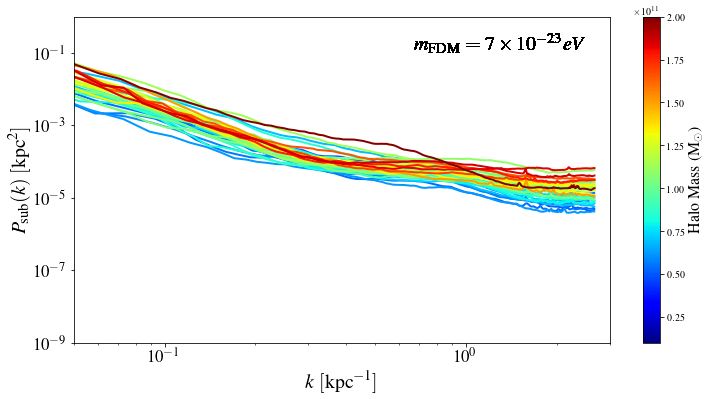

In [57]:
# Takes in power spectra results and plots

# Compute power spectra of first 12 most massive halos with 100 random projections each
# FDM Initial Conditions

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
from astropy import units as u
from scipy.fftpack import fft2
import quantstyles

halo_IDs = [ 0,   1,   3,   4,   5,   8,   7,  14,  10,   6,   9,  20,  18,
            13,  17,  11,  12,  15,   2,  29,  24,  22,  19,  25,  27,  31,
            33,  26,  36,  41,  32,  30,  21,  35,  37,  42,  39,  45,  47,
            46,  48,  38,  43,  40,  44,  23,  53,  54,  55,  51,  34,  62,
            56,  60,  74,  76,  68,  58,  80,  69,  83,  88,  87,  70,  79,
            92,  82, 133]

def plot_power_spectrum(k, radial_average, label=None, linewidth=1, color = None, alpha = 0.5):
    plt.plot(k, radial_average, label=label, linewidth=linewidth, color = color, alpha = alpha)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$k \; [\mathrm{kpc}^{-1}]$', fontsize=20)
    plt.ylabel(r'$P_{\mathrm{sub}}(k) \; [\mathrm{kpc}^2]$', fontsize=20)
    plt.xticks(fontsize = 17)
    plt.yticks(fontsize = 17)
    plt.text(0.95, 0.95, r'$m_{\mathrm{FDM}} = 7 \times 10^{-23} eV$', 
             verticalalignment='top', horizontalalignment='right',
             transform=plt.gca().transAxes, fontsize=20)
    plt.rc('text', usetex=True)  # Enables rendering with TeX
    plt.rc('font', family='serif')
    plt.rc('text.latex', preamble=r'\usepackage{mathptmx}')
    
    
def get_mass_rad(catalog_path, halo_ID):
    mass_rad_catalog = np.loadtxt(catalog_path)
    halo_IDs = []
    halo_masses = []
    halo_radii = []
    for line in mass_rad_catalog:
        halo_IDs.append(int(line[0]))
        halo_masses.append(line[1])
        halo_radii.append(line[2])
    halo_indx = halo_IDs.index(halo_ID)
    halo_mass = halo_masses[halo_indx]
    halo_radius = halo_radii[halo_indx]
    return halo_mass, halo_radius

fig, ax = plt.subplots(figsize=(12, 6))
plt.xlim(0.05, 3)
plt.ylim(1e-9, 1)

catalog_path = "/n/holyscratch01/dvorkin_lab/nephremidze/may-springel-fuzzy-dark-matter-simulations/fdm-ic_p8640_b10000_m7e-23/fdm_p8640_b10000_m7e-23_z3.txt"
catalog_data = np.loadtxt(catalog_path)
M_200s = []
for i in range(len(halo_IDs)):
    line = catalog_data[i]
    M_200s.append(line[1])
    
norm = plt.Normalize(vmin=1e10, vmax=2e11)
cmap = plt.cm.get_cmap('jet')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Halo Mass ($\mathrm{{M}}_\odot$)', fontsize = 16)

pix_size = 1.16/0.7

for i in range(len(halo_IDs)):
    i = len(halo_IDs) - (i+1)
    halo_num = str(halo_IDs[i])
    
    M_200 = M_200s[i]
    color = cmap(norm(M_200))

    if M_200 > 5e10 and M_200 < 2e11:
        sub_avg_ps = np.load("sub_avg_power_spectrum_"+halo_num+".npy")
        avg_k = sub_avg_ps[0]
        avg_power_spectrum = sub_avg_ps[1]

        plot_power_spectrum(avg_k, avg_power_spectrum/(pix_size)**2, label='Substructure', linewidth=2.0, color=color, alpha = 1.0)

        host_ps = np.load("host_power_spectrum_"+halo_num+".npy")
        avg_k = host_ps[0]
        avg_power_spectrum = host_ps[1]


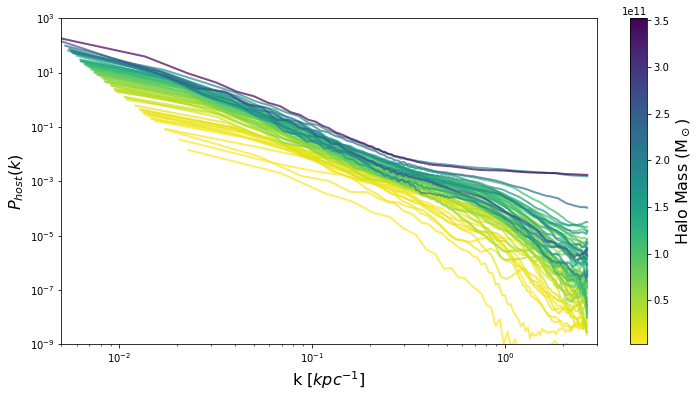

In [20]:
# Takes in power spectra results and plots

# Compute power spectra of first 12 most massive halos with 100 random projections each
# FDM Initial Conditions

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
from astropy import units as u
from scipy.fftpack import fft2
import quantstyles

halo_IDs = [ 0,   1,   3,   4,   5,   8,   7,  14,  10,   6,   9,  20,  18,
            13,  17,  11,  12,  15,   2,  29,  24,  22,  19,  25,  27,  31,
            33,  26,  36,  41,  32,  30,  21,  35,  37,  42,  39,  45,  47,
            46,  48,  38,  43,  40,  44,  23,  53,  54,  55,  51,  34,  62,
            56,  60,  74,  76,  68,  58,  80,  69,  83,  88,  87,  70,  79,
            92,  82, 133]

def plot_power_spectrum(k, radial_average, line_type = '-', label=None, linewidth=1, color = None, alpha = 0.5):
    plt.plot(k, radial_average, label=label, linewidth=linewidth, color = color, alpha = alpha)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k [$kpc^{-1}$]', fontsize=16)
    plt.ylabel('$P_{sub}(k)$', fontsize=16)
    
def get_mass_rad(catalog_path, halo_ID):
    mass_rad_catalog = np.loadtxt(catalog_path)
    halo_IDs = []
    halo_masses = []
    halo_radii = []
    for line in mass_rad_catalog:
        halo_IDs.append(int(line[0]))
        halo_masses.append(line[1])
        halo_radii.append(line[2])
    halo_indx = halo_IDs.index(halo_ID)
    halo_mass = halo_masses[halo_indx]
    halo_radius = halo_radii[halo_indx]
    return halo_mass, halo_radius

fig, ax = plt.subplots(figsize=(12, 6))
plt.xlim(0.005, 3)
plt.ylim(1e-9, 1000)

catalog_path = "/n/holyscratch01/dvorkin_lab/nephremidze/may-springel-fuzzy-dark-matter-simulations/fdm-ic_p8640_b10000_m7e-23/fdm_p8640_b10000_m7e-23_z3.txt"
catalog_data = np.loadtxt(catalog_path)
M_200s = []
for i in range(len(halo_IDs)):
    line = catalog_data[i]
    M_200s.append(line[1])
    
norm = plt.Normalize(vmin=np.min(M_200s), vmax=np.max(M_200s))
cmap = plt.cm.get_cmap('viridis_r')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Halo Mass ($\mathrm{{M}}_\odot$)', fontsize = 16)


for i in range(len(halo_IDs)):
    i = len(halo_IDs) - (i+1)
    halo_num = str(halo_IDs[i])
    
    M_200 = M_200s[i]
    color = cmap(norm(M_200))
    
    #if M_200 > 1e11:

    host_ps = np.load("host_power_spectrum_"+halo_num+".npy")
    avg_k = host_ps[0]
    avg_power_spectrum = host_ps[1]

    plot_power_spectrum(avg_k, avg_power_spectrum, line_type = '--', label='Substructure', linewidth=2.0, color=color, alpha = 0.7)

    plt.ylabel('$P_{host}(k)$', fontsize=16)

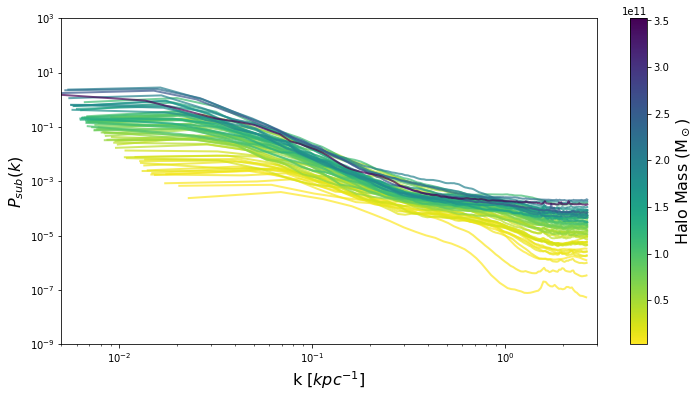

In [21]:
# Takes in power spectra results and plots

# Compute power spectra of first 12 most massive halos with 100 random projections each
# FDM Initial Conditions

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
from astropy import units as u
from scipy.fftpack import fft2
import quantstyles

halo_IDs = [ 0,   1,   3,   4,   5,   8,   7,  14,  10,   6,   9,  20,  18,
            13,  17,  11,  12,  15,   2,  29,  24,  22,  19,  25,  27,  31,
            33,  26,  36,  41,  32,  30,  21,  35,  37,  42,  39,  45,  47,
            46,  48,  38,  43,  40,  44,  23,  53,  54,  55,  51,  34,  62,
            56,  60,  74,  76,  68,  58,  80,  69,  83,  88,  87,  70,  79,
            92,  82, 133]

def plot_power_spectrum(k, radial_average, line_type = '-', label=None, linewidth=1, color = None, alpha = 0.5):
    plt.plot(k, radial_average, label=label, linewidth=linewidth, color = color, alpha = alpha)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k [$kpc^{-1}$]', fontsize=16)
    plt.ylabel('$P_{sub}(k)$', fontsize=16)
    
def get_mass_rad(catalog_path, halo_ID):
    mass_rad_catalog = np.loadtxt(catalog_path)
    halo_IDs = []
    halo_masses = []
    halo_radii = []
    for line in mass_rad_catalog:
        halo_IDs.append(int(line[0]))
        halo_masses.append(line[1])
        halo_radii.append(line[2])
    halo_indx = halo_IDs.index(halo_ID)
    halo_mass = halo_masses[halo_indx]
    halo_radius = halo_radii[halo_indx]
    return halo_mass, halo_radius

fig, ax = plt.subplots(figsize=(12, 6))
plt.xlim(0.005, 3)
plt.ylim(1e-9, 1000)

catalog_path = "/n/holyscratch01/dvorkin_lab/nephremidze/may-springel-fuzzy-dark-matter-simulations/fdm-ic_p8640_b10000_m7e-23/fdm_p8640_b10000_m7e-23_z3.txt"
catalog_data = np.loadtxt(catalog_path)
M_200s = []
for i in range(len(halo_IDs)):
    line = catalog_data[i]
    M_200s.append(line[1])
    
norm = plt.Normalize(vmin=np.min(M_200s), vmax=np.max(M_200s))
cmap = plt.cm.get_cmap('viridis_r')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Halo Mass ($\mathrm{{M}}_\odot$)', fontsize = 16)


for i in range(len(halo_IDs)):
    i = len(halo_IDs) - (i+1)
    halo_num = str(halo_IDs[i])
    
    M_200 = M_200s[i]
    color = cmap(norm(M_200))
    
    #if M_200 > 1e11:

    sub_avg_ps = np.load("sub_avg_power_spectrum_"+halo_num+".npy")
    avg_k = sub_avg_ps[0]
    avg_power_spectrum = sub_avg_ps[1]

    plot_power_spectrum(avg_k, avg_power_spectrum, line_type = '--', label='Substructure', linewidth=2.0, color=color, alpha = 0.7)
